In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  

## Plot data in diffusion map

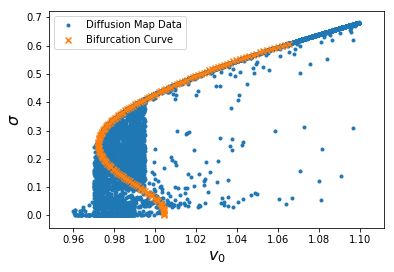

In [2]:
numCars = 30

# plot all data in the diffusion map
data = np.loadtxt(open("data/data_full.csv", "rb"), delimiter=",")
vel = data[:, -1]
hways = np.loadtxt(open("data/data_headways.csv", "rb"), delimiter=",")
s = np.std(hways, axis = 0)
m = np.argmax(hways, axis = 0)
plt.scatter(vel, s, marker = '.', label = 'Diffusion Map Data')

# plot the true bifurcation curve for reference
micro = np.loadtxt(open("results/microBif.csv", "rb"), delimiter=",")
plt.scatter(micro[-1, :], np.std(micro[0:numCars, :], axis = 0), marker = 'x', 
                  label = 'Bifurcation Curve')
plt.xlabel('$v_0$', fontsize = 16)
plt.ylabel('$\sigma$',fontsize = 16)
plt.legend(loc='upper left', fontsize = 10)
plt.show()

## Plot data histograms 

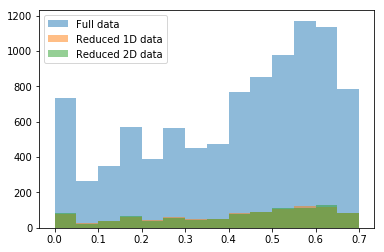

In [3]:
reduced1D = np.loadtxt(open("data/1000diffMap1D.csv", "rb"), delimiter=",")
reduced2D = np.loadtxt(open("data/1000diffMap2D.csv", "rb"), delimiter=",")
s1 = np.std(reduced1D, axis = 0)
s2 = np.std(reduced2D, axis = 0)

bins = np.linspace(0, 0.7, 15)
plt.hist(s, bins, alpha=0.5, label='Full data')
plt.hist(s1, bins, alpha=0.5, label='Reduced 1D data')
plt.hist(s2, bins, alpha=0.5, label='Reduced 2D data')
plt.legend(loc='upper left')
plt.show()

## Plot diffusion map embeddings

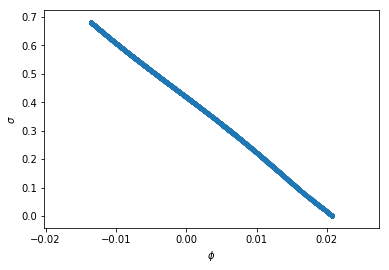

In [4]:
# plot all data in the 1D diffusion map
embed1D = np.loadtxt(open("results/embedding1D.csv", "rb"), delimiter=",")
plt.scatter(embed1D, s, marker = '.')
plt.xlabel("$\phi$")
plt.ylabel("$\sigma$")
plt.show()

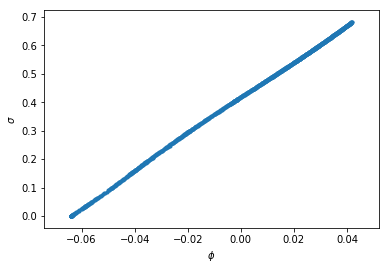

In [10]:
# plot all data in the reduced 1D diffusion map
embed1D_reduced = np.loadtxt(open("results/1000embedding1D.csv", "rb"), delimiter=",")
plt.scatter(embed1D_reduced, s1, marker = '.')
plt.xlabel("$\phi$")
plt.ylabel("$\sigma$")
plt.show()

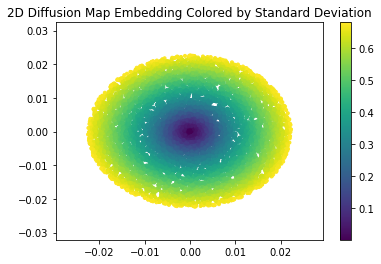

In [5]:
# plot all data in the 2D diffusion map
embed2D = np.loadtxt(open("results/embedding2D.csv", "rb"), delimiter=",")
plt.scatter(embed2D[:,0], embed2D[:,1], marker = '.', c=s)
plt.title("2D Diffusion Map Embedding Colored by Standard Deviation")
plt.colorbar()
plt.show()

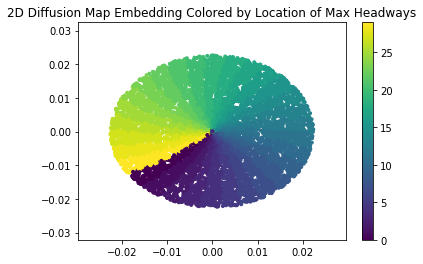

In [6]:
plt.scatter(embed2D[:,0], embed2D[:,1], marker = '.', c=m)
plt.title("2D Diffusion Map Embedding Colored by Location of Max Headways")
plt.colorbar()
plt.show()

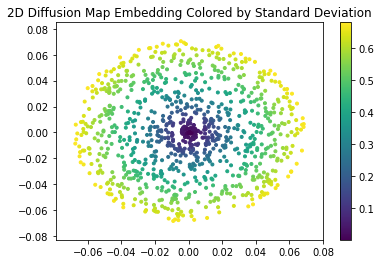

In [11]:
# plot all data in the reduced 2D diffusion map
embed2D_reduced = np.loadtxt(open("results/1000embedding2D.csv", "rb"), delimiter=",")
plt.scatter(embed2D_reduced[:,0], embed2D_reduced[:,1], marker = '.', c=s2)
plt.title("2D Diffusion Map Embedding Colored by Standard Deviation")
plt.colorbar()
plt.show()

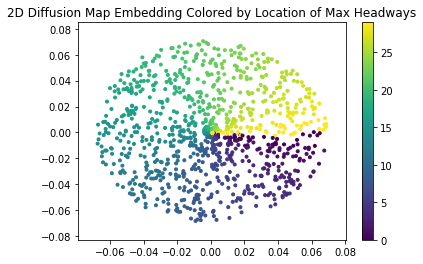

In [13]:
m2 = np.argmax(reduced2D, axis = 0)
plt.scatter(embed2D_reduced [:,0], embed2D_reduced [:,1], marker = '.', c=m2)
plt.title("2D Diffusion Map Embedding Colored by Location of Max Headways")
plt.colorbar()
plt.show()

## Plot linear fit coefficients

## Plot bifurcation diagrams

In [7]:
efd1D = np.loadtxt(open("results/bifurcation1D.csv", "rb"), delimiter=",")
efd1D_1000 = np.loadtxt(open("results/1000bifurcation1D.csv", "rb"), delimiter=",")
efd2D = np.loadtxt(open("results/bifurcation2D.csv", "rb"), delimiter=",")
efd2D_1000 = np.loadtxt(open("results/1000bifurcation2D.csv", "rb"), delimiter=",")

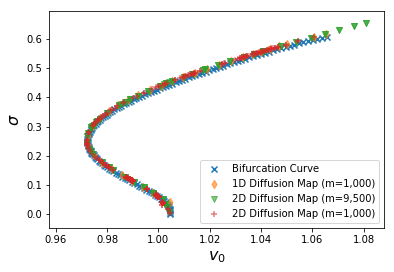

In [8]:
# plot all bifurcation diagrams together
alpha_level = 0.6
plt.scatter(micro[-1, :], np.std(micro[0:numCars, :], axis = 0), marker = 'x', 
                  label = 'Bifurcation Curve')
#plt.scatter(efd1D[1,:], efd1D[-1,:], marker = 'o', alpha = alpha_level,  
#            label = '1D Diffusion Map (m=9,500)')
plt.scatter(efd1D_1000[1,:], efd1D_1000[-1,:], marker = 'd',  alpha = alpha_level, 
            label = '1D Diffusion Map (m=1,000)')
plt.scatter(efd2D[2,:], efd2D[-1,:], marker = 'v',  
            alpha = alpha_level,  label = '2D Diffusion Map (m=9,500)')
plt.scatter(efd2D_1000[2,:], efd2D_1000[-1,:], marker = '+',
            alpha = alpha_level, label = '2D Diffusion Map (m=1,000)')
plt.legend(loc='lower right', fontsize = 10)
plt.xlabel('$v_0$', size=16)
plt.ylabel('$\sigma$', size=16)
plt.show()

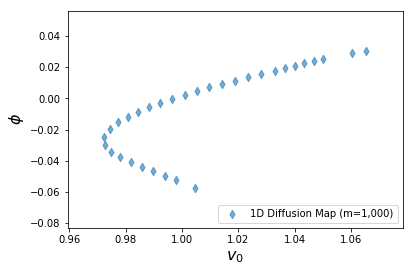

In [14]:
# plot just the 1D bifurcation diagram
alpha_level = 0.6
#plt.scatter(efd1D[1,:], efd1D[-1,:], marker = 'o', alpha = alpha_level,  
#            label = '1D Diffusion Map (m=9,500)')
plt.scatter(efd1D_1000[1,:], efd1D_1000[0,:], marker = 'd',  alpha = alpha_level, 
            label = '1D Diffusion Map (m=1,000)')
plt.legend(loc='lower right', fontsize = 10)
plt.xlabel('$v_0$', size=16)
plt.ylabel('$\phi$', size=16)
plt.show()

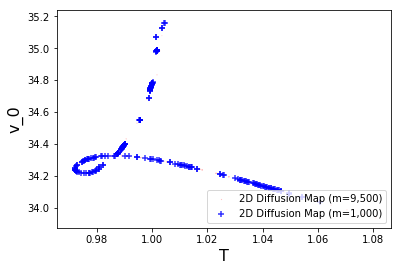

In [36]:
# plot T vs v0 projection (can't do \rho since different coords)
alpha_level = 0.8
plt.scatter(efd2D[2,:], efd2D[1,:], efd2D[0,:], marker = 'o', c='r',
            alpha = alpha_level,  label = '2D Diffusion Map (m=9,500)')
plt.scatter(efd2D_1000[2,:], efd2D_1000[1,:], marker = '+', c= 'b',
            alpha = alpha_level, label = '2D Diffusion Map (m=1,000)')
plt.legend(loc='lower right', fontsize = 10)
plt.xlabel('T', size=16)
plt.ylabel('v_0', size=16)
plt.show()

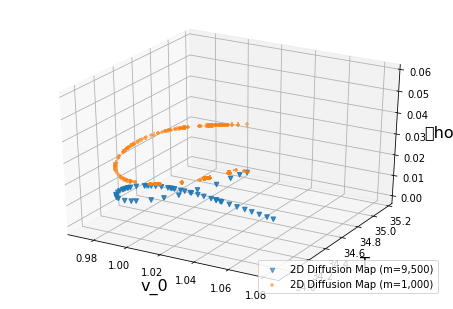

In [28]:
# plot the 2d bifurcation diagrams 
fig = plt.figure()
ax = Axes3D(fig)
alpha_level = 0.6
ax.scatter(efd2D[2,:], efd2D[1,:], efd2D[0,:], marker = 'v',  
            alpha = alpha_level,  label = '2D Diffusion Map (m=9,500)')
ax.scatter(efd2D_1000[2,:], efd2D_1000[1,:], efd2D_1000[0,:], marker = '+',
            alpha = alpha_level, label = '2D Diffusion Map (m=1,000)')
ax.legend(loc='lower right', fontsize = 10)
ax.set_xlabel('v_0', size=16)
ax.set_ylabel('T', size=16)
ax.set_zlabel('\rho', size = 16)
plt.show()